In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from collections import Counter
from xgboost import XGBClassifier


from mlxtend.classifier import StackingCVClassifier

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

target
1    165
0    138
Name: count, dtype: int64


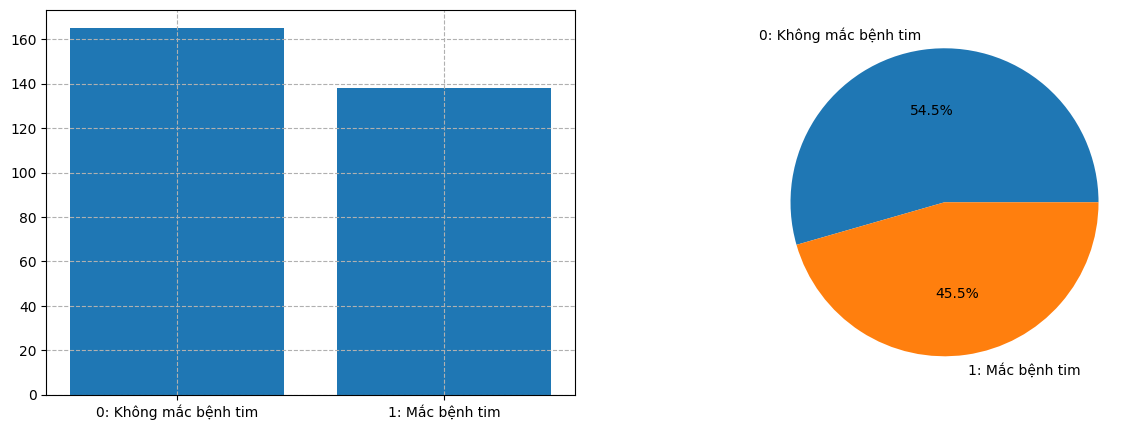

In [42]:
#Kiểm tra cân bằng dữ liệu: Kiểm tra thuộc tính phụ thuộc
check_y = data['target'].value_counts()
label_x = ['0: Không mắc bệnh tim','1: Mắc bệnh tim']
print(check_y)
#Vẽ biểu đồ thể hiện số lượng theo từng lơp:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.bar(label_x, check_y.values)
plt.grid(ls='--')

plt.subplot(1,2,2)
plt.pie(check_y.values,
        labels=label_x,
        autopct='%.1f%%')

plt.show()

In [43]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [44]:
# tách biến độc lập và phụ thuộc
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

print(X.sample(3))
print('------------')
print(y.sample(3))

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
188   50    1   2       140   233    0        1      163      0      0.6   
114   55    1   1       130   262    0        1      155      0      0.0   
38    65    0   2       155   269    0        1      148      0      0.8   

     slope  ca  thal  
188      1   1     3  
114      2   0     2  
38       2   0     2  
------------
301    0
204    0
170    0
Name: target, dtype: int64


In [45]:
print(y_test.unique())

print(Counter(y_train))

# chuẩn hoá dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[0 1]
Counter({1: 131, 0: 111})


## **ML models**

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifio4t
5. K-Nearest Neighb5ur
6. DeciTree 6ree
7. Support Vector Machine

In [47]:
#1.Logistic Regression
m1 = 'Logistic Regression'
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("confussion matrix: ")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix: 
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [48]:
#2.Naive Bayes
m2 = 'Naive Bayes'
nb = GaussianNB()

nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)

nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[21  6]
 [ 3 31]]


Accuracy of Naive Bayes model: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [49]:
#3. Random Forest Classifier
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)

rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[22  5]
 [ 3 31]]


Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [74]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=8, gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='gbtree', colsample_bylevel=0.6, colsample_bynode=0.5, random_state=27)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[21  6]
 [ 2 32]]


Accuracy of Extreme Gradient Boost: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [51]:
#4.KNN
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[24  3]
 [ 4 30]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [52]:
#5.Decision Tree
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)

dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)

dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[23  4]
 [ 7 27]]


Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [53]:
#6.Support Vector Machine (Support Vector Classification)
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)

svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)

svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



## **Đánh giá mô hình**

In [55]:
model_dg = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'],
              'Accuracy': [lr_acc_score*100,nb_acc_score*100,rf_acc_score*100,
                           knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_dg

,Model,Accuracy
0,Logistic Regression,85.245902
1,Naive Bayes,85.245902
2,Random Forest,86.885246
3,K-Nearest Neighbour,88.524590
4,Decision Tree,81.967213
5,Support Vector Machine,88.524590


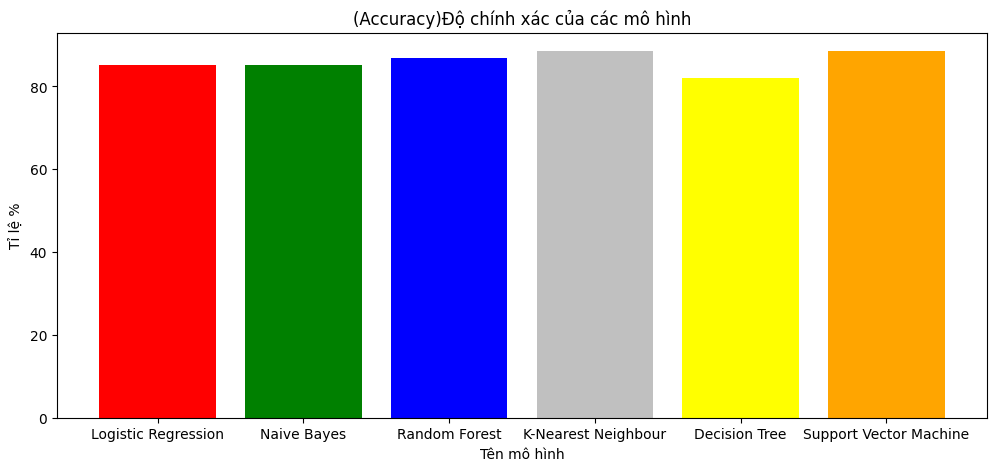

In [56]:
colors = ['red','green','blue','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("(Accuracy)Độ chính xác của các mô hình")
plt.xlabel("Tên mô hình")
plt.ylabel("Tỉ lệ %")
plt.bar(model_dg['Model'],model_dg['Accuracy'],color = colors)
plt.show()